![header](../figures/logos_partenaires._cmems_se.jpg)

# Evaluate baseline on Nadir tracks

<div style="text-align: right"><i> 2023-01-19 demo_evaluation_onnadirs_baseline </i></div>

***
**Authors:**  Datlas, IGE, IMT-Atlantique & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMT-Atlantique & CLS <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Evaluate baseline calibration on Nadir tracks </center></h1></div>

In [1]:
import os
import glob
import sys
import numpy as np
sys.path.append('..')
from src.swot import * 
from src.eval_on_nadirtrack import * 
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-info" role="alert">

<h2>1. Downloading the Nadir satellite data for evaluations </h2>

</div>

In [2]:
# Check if inputs have already been downloaded otherwise do
if len(os.listdir('../inputs/dc_SWOTcalibGS_inputs/'))<2:
    # Get pseuso-observation
    print('Downloading and unzipping inputs')
    !wget https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/ocean-data-challenges/2022c_SWOT_error_calibration_GS/dc_SWOTcalibGS_inputs.tar.gz
    !tar -xvf dc_SWOTcalibGS_inputs.tar.gz dc_SWOTcalibGS_inputs    
    !mv dc_SWOTcalibGS_inputs  ../inputs/    
    !rm dc_SWOTcalibGS_inputs.tar.gz 

# Check if nadir satellite data have already been downloaded otherwise do
if len(os.listdir('../inputs/dc_SWOTcalibGS_nadirs/'))<2:
    # Get pseuso-observation
    print('Downloading and unzipping inputs')
    !wget https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/ocean-data-challenges/2022c_SWOT_error_calibration_GS/dc_SWOTcalibGS_nadirs.tar.gz
    !tar -xvf dc_SWOTcalibGS_nadirs.tar.gz dc_SWOTcalibGS_nadirs    
    !mv dc_SWOTcalibGS_nadirs  ../inputs/    
    !rm dc_SWOTcalibGS_nadirs.tar.gz 

In [3]:
sats = ['../inputs/dc_SWOTcalibGS_nadirs/dc_SWOTcalibGS_jason1.nc',
        '../inputs/dc_SWOTcalibGS_nadirs/dc_SWOTcalibGS_envisat.nc',
        '../inputs/dc_SWOTcalibGS_nadirs/dc_SWOTcalibGS_geosat2.nc',
        '../inputs/dc_SWOTcalibGS_nadirs/dc_SWOTcalibGS_topexposeidon.nc'
       ]


<div class="alert alert-info" role="alert">

<h2>2. Interpolating SWOT input data </h2>

</div>

## Interpolating input data

In [4]:
dir_of_swottracks = '../inputs/dc_SWOTcalibGS_inputs/'
swottracks_name = 'inputs' 
nremoval = 2
  
lonalong, latalong, timealong, refalong, x_acalong, sshalong_true, sshalong_err = interp_swot2nadir(sats, dir_of_swottracks, swottracks_name, nremoval,ref_nadir='model')


## Interpolating calibration

In [5]:
dir_of_swottracks = '../results/demo_baseline/' 
swottracks_name = 'ssh_err_calib' 

# WARNING: Calibrated SWOT data files must start with dc_*

_,_,_,_,_,sshalong_calib = interp_swot2nadir(sats, dir_of_swottracks, swottracks_name, nremoval,ref_nadir='model')


<div class="alert alert-info" role="alert">

<h2>4. Compute diagnostics along nadir tracks </h2>

</div>

In [6]:
calib_name = 'BASELINE'
etuvar = 'sshalong_calib'

file_calib = '../results/demo_baseline/calib_onnadirtracks.nc'
file_inputs = '../inputs/dc_SWOTcalibGS_inputs/ref_onnadirtracks.nc'

output_dir = '../results/demo_baseline/'
stat_output_filename = f'{output_dir}/stat_onnadirs_'+calib_name+'.nc'
psd_output_filename = f'{output_dir}/psd_onnadirs_'+calib_name+'.nc'

calib_bench_onnadirs = Benchmark_onNadirs() 

## 4.1 - Plotting point-wise error on the nadir tracks

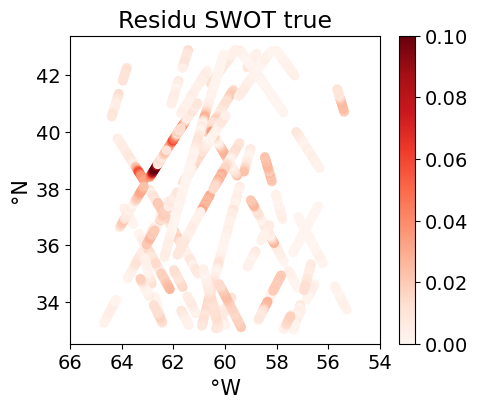

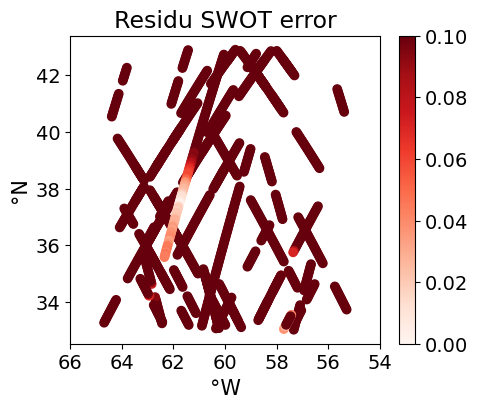

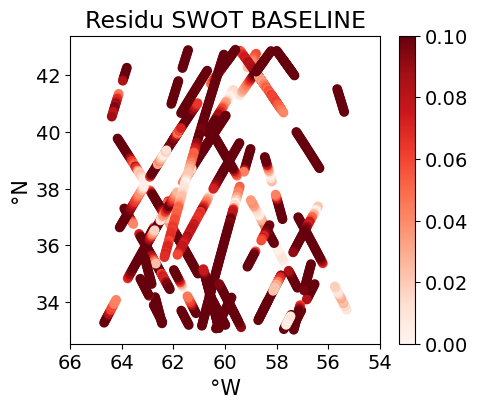

---------------------------------
Global RMSE
RMSE True SWOT: 0.012959922162290178
RMSE Err SWOT: 4.041269790275009
RMSE BASELINE SWOT: 0.21819253395375865


In [7]:
calib_bench_onnadirs.compute_stats(file_calib,etuvar,file_inputs)
calib_bench_onnadirs.write_stats(stat_output_filename, calib=calib_name)
calib_bench_onnadirs.display_stats(stat_output_filename, calib=calib_name)

## 4.2 - Plotting point-wise error across tracks

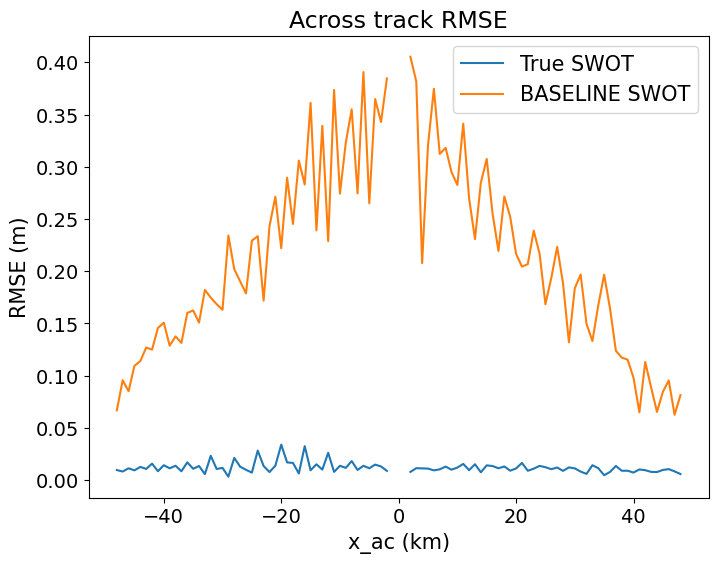

In [8]:
calib_bench_onnadirs.display_stats_acrosstrack(stat_output_filename, calib=calib_name)

## 4.3 - Plotting power spectrum density and noise-to-signal ratio 

Number of available segments of lengh_scale 100 km: 15


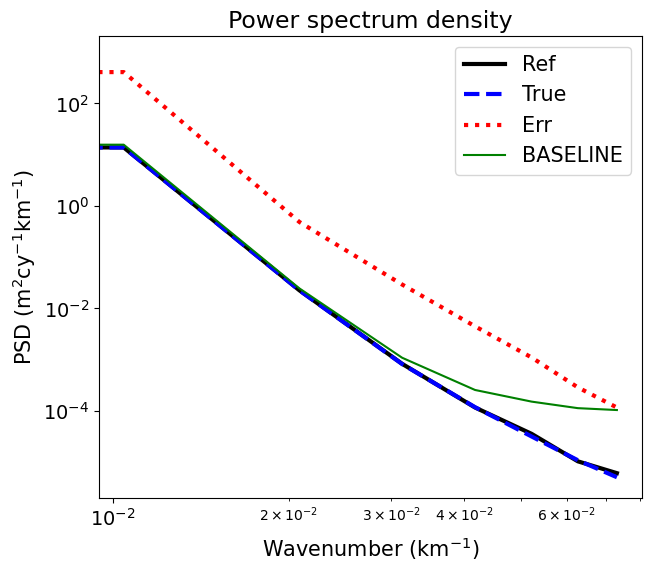

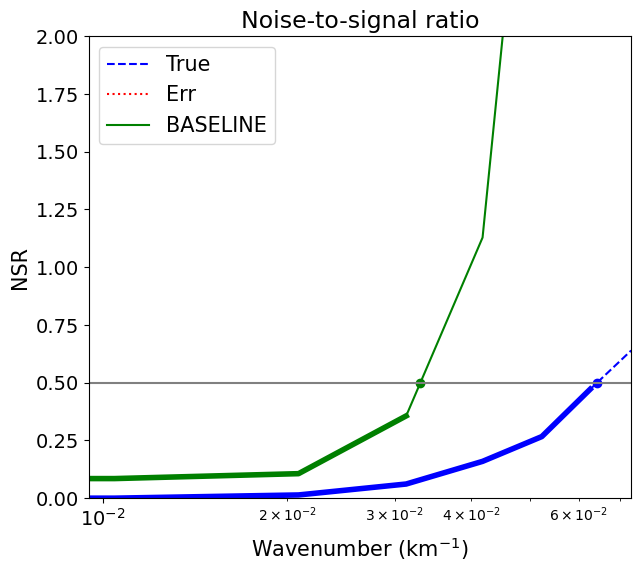

---------------------------------
Global SNR intervals
SNR=0.5 SWOT true: [ 15.560723147702396 , inf ] km
SNR=0.5 SWOT error: nan km
SNR=0.5 SWOT BASELINE: [ 30.270270792686773 , inf ] km


In [9]:

calib_bench_onnadirs.compute_psd(file_calib,etuvar,file_inputs)
calib_bench_onnadirs.write_psd(psd_output_filename, calib=calib_name)
calib_bench_onnadirs.display_psd(psd_output_filename, calib=calib_name)
